In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,-0.404905
1,2016-01-26,2.624968
2,2016-01-27,0.862909
3,2016-01-28,4.929958
4,2016-01-29,4.518222
5,2016-01-30,5.056519
6,2016-01-31,6.002114
7,2016-02-01,4.932465
8,2016-02-02,7.873293
9,2016-02-03,8.598243


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,18.703524
349,2017-01-08,20.037125
350,2017-01-09,20.975864
351,2017-01-10,23.333540
352,2017-01-11,24.942151
353,2017-01-12,24.450637
354,2017-01-13,25.245561
355,2017-01-14,27.874733
356,2017-01-15,27.590369
357,2017-01-16,6.794563


<AxesSubplot:xlabel='Date'>

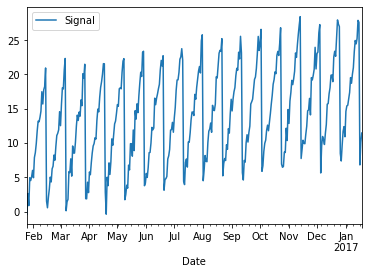

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Signal'], 'Transformations': [('Signal', 'None', '_', 'T+S+R'), ('Signal', 'None', 'Diff_', 'T+S+R'), ('Signal', 'None', 'RelDiff_', 'T+S+R'), ('Signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Transformation': '_Signal'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Transformation': 'Diff_Signal'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Transformation': 'RelDiff_Signal'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Transformation': 'CumSum_Signal'}))
/home/antoine/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/antoine/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResources

INFO:pyaf.std:AR_MODEL_COEFF 10 _Signal_LinearTrend_residue_zeroCycle[0.0]_residue_Lag44 -0.06812164019474083
INFO:pyaf.std:AR_MODEL_DETAIL_END


INFO:pyaf.timing:('OPERATION_START', ('PLOTTING', {'Signals': ['Signal']}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 1.514, ('PLOTTING', {'Signals': ['Signal']}))


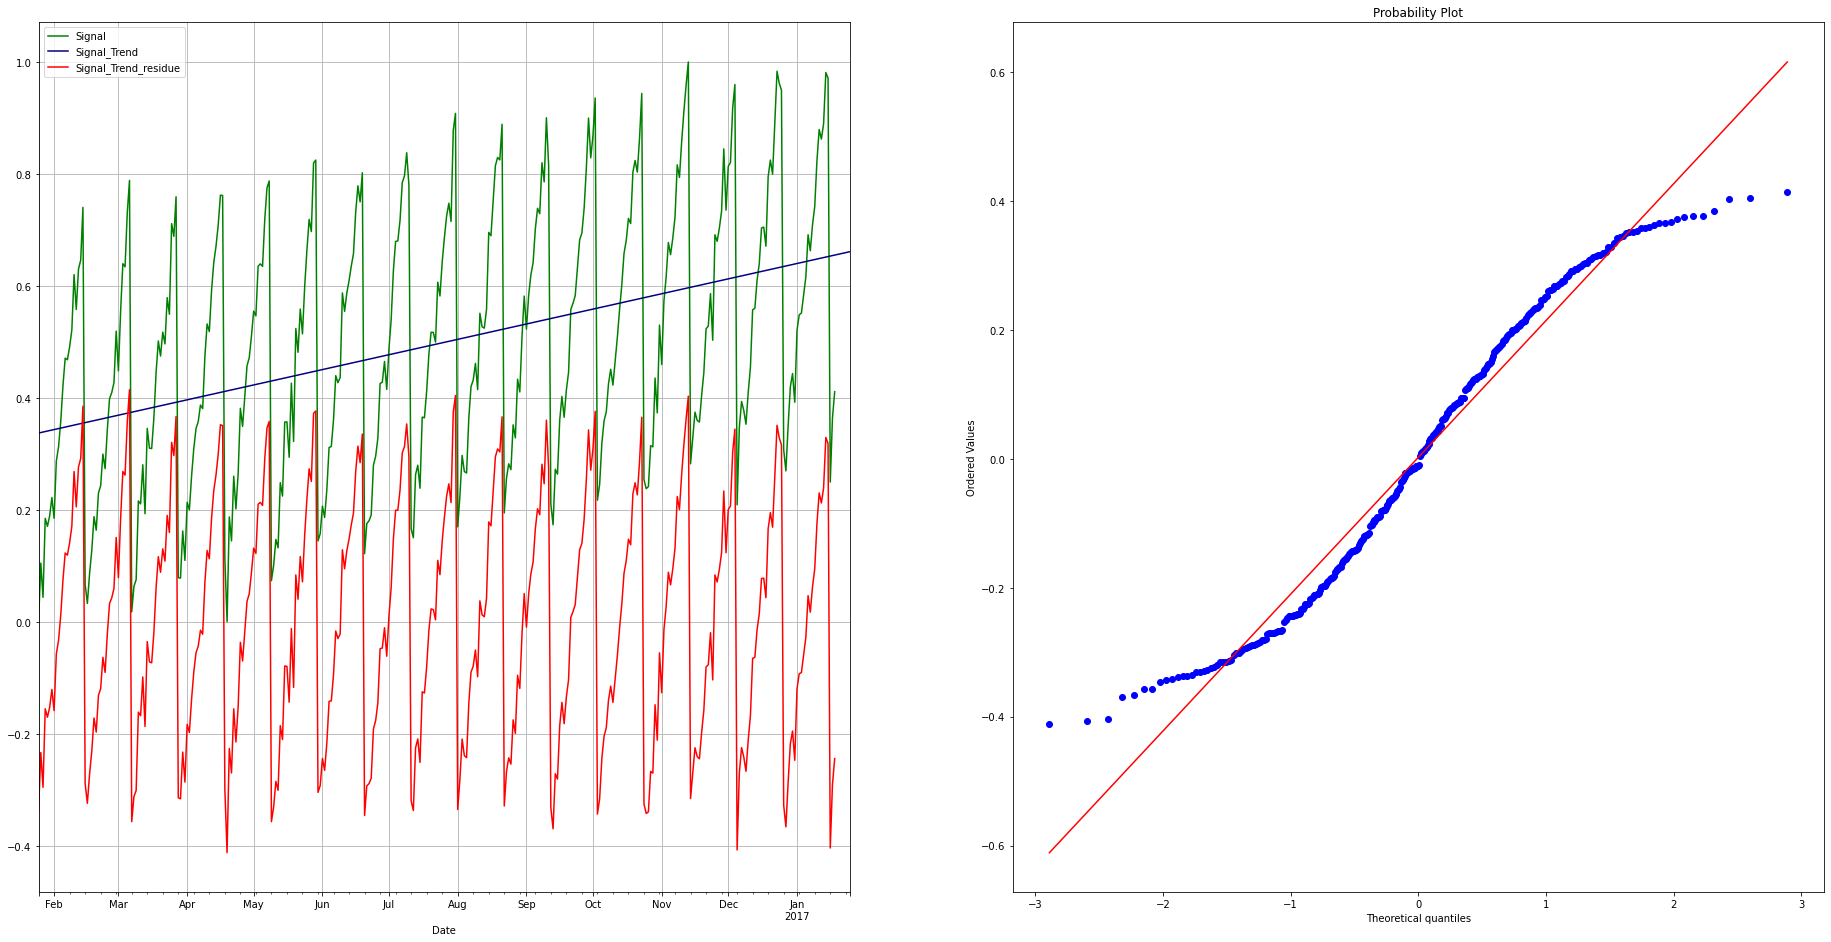

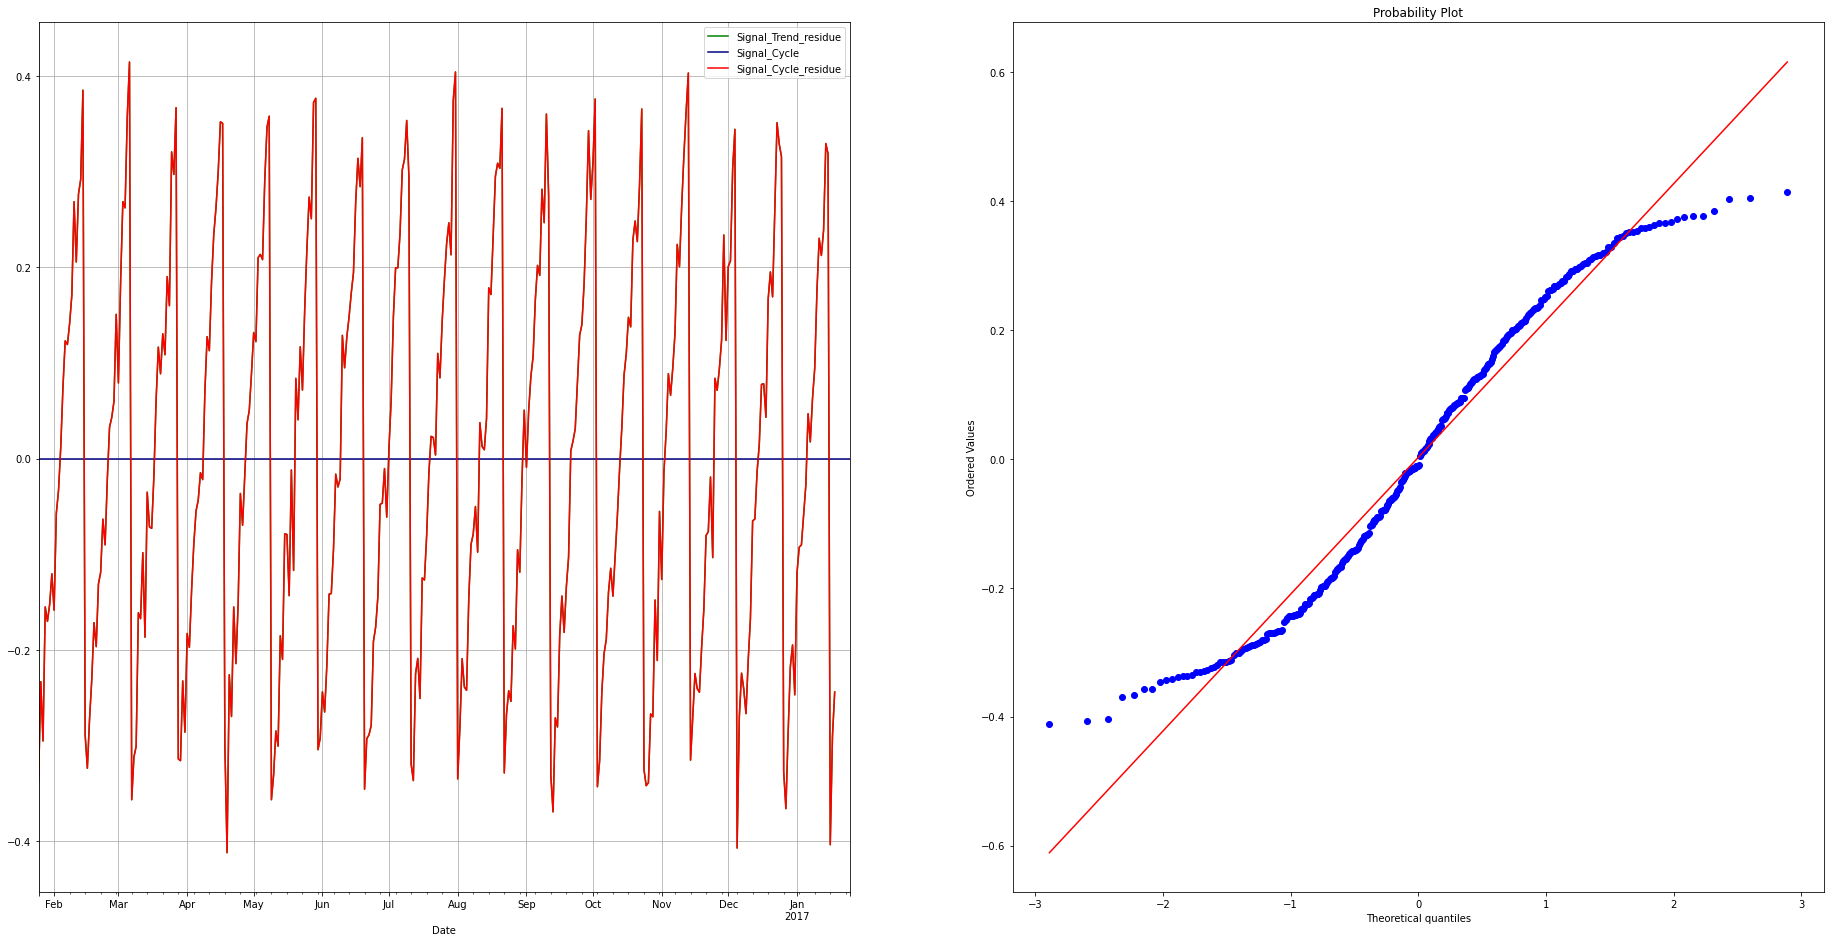

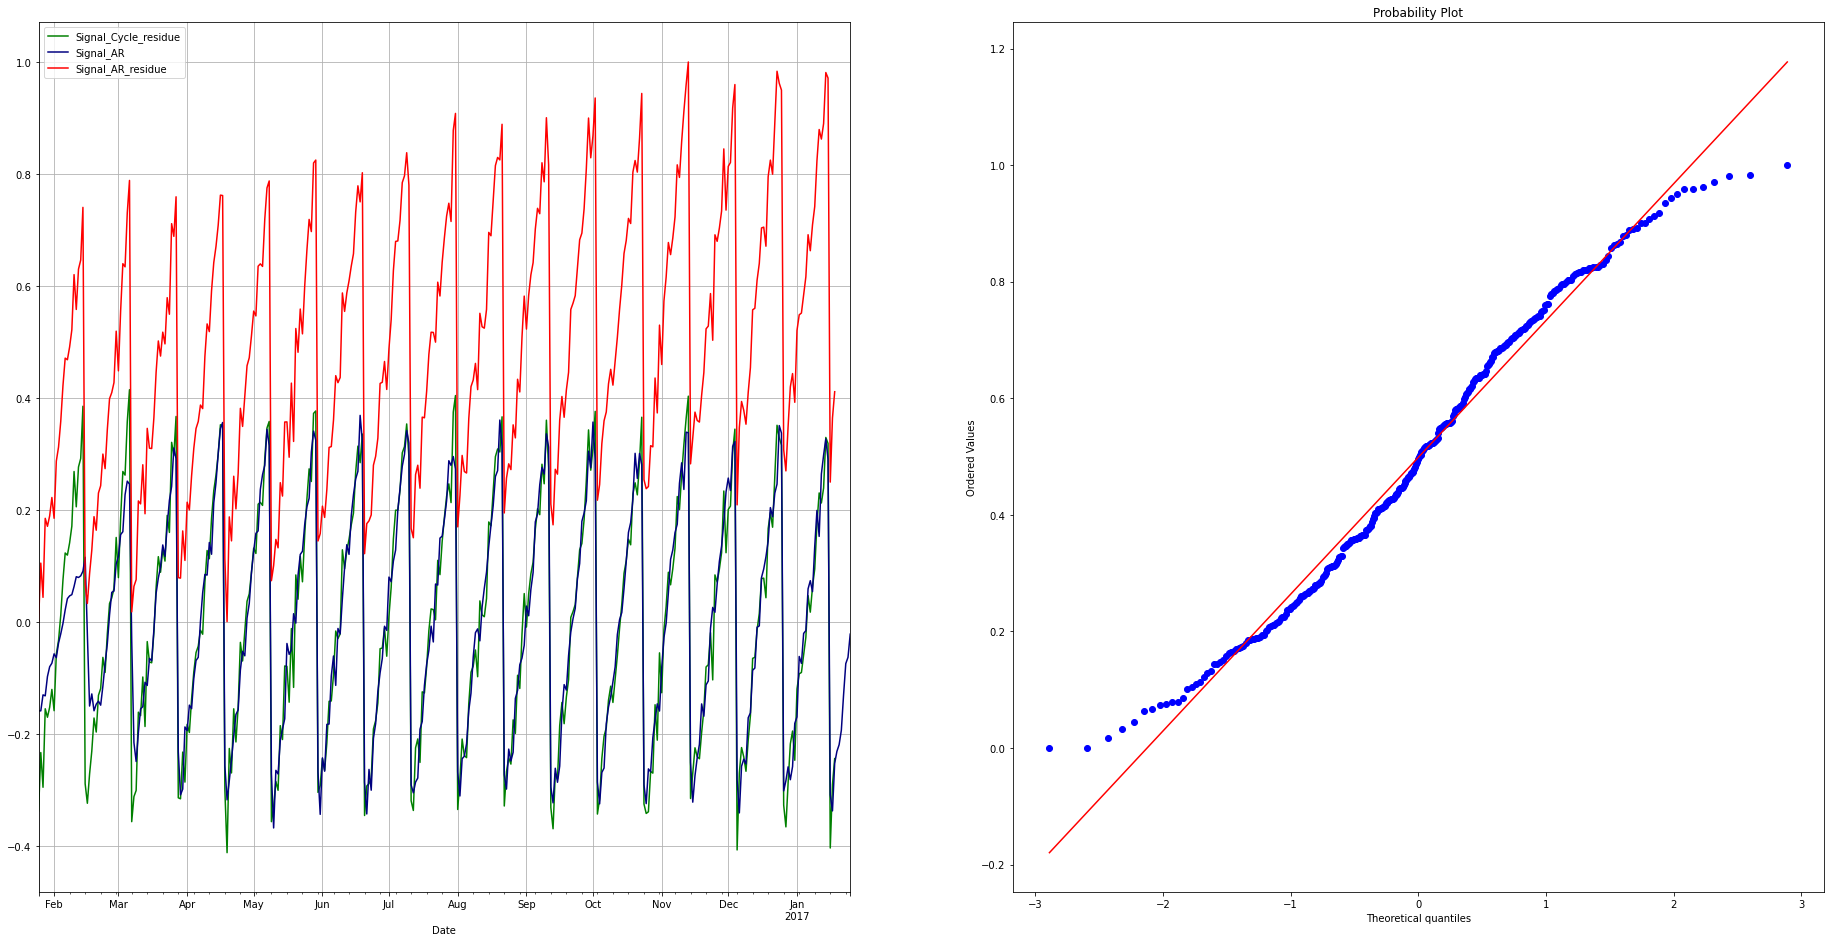

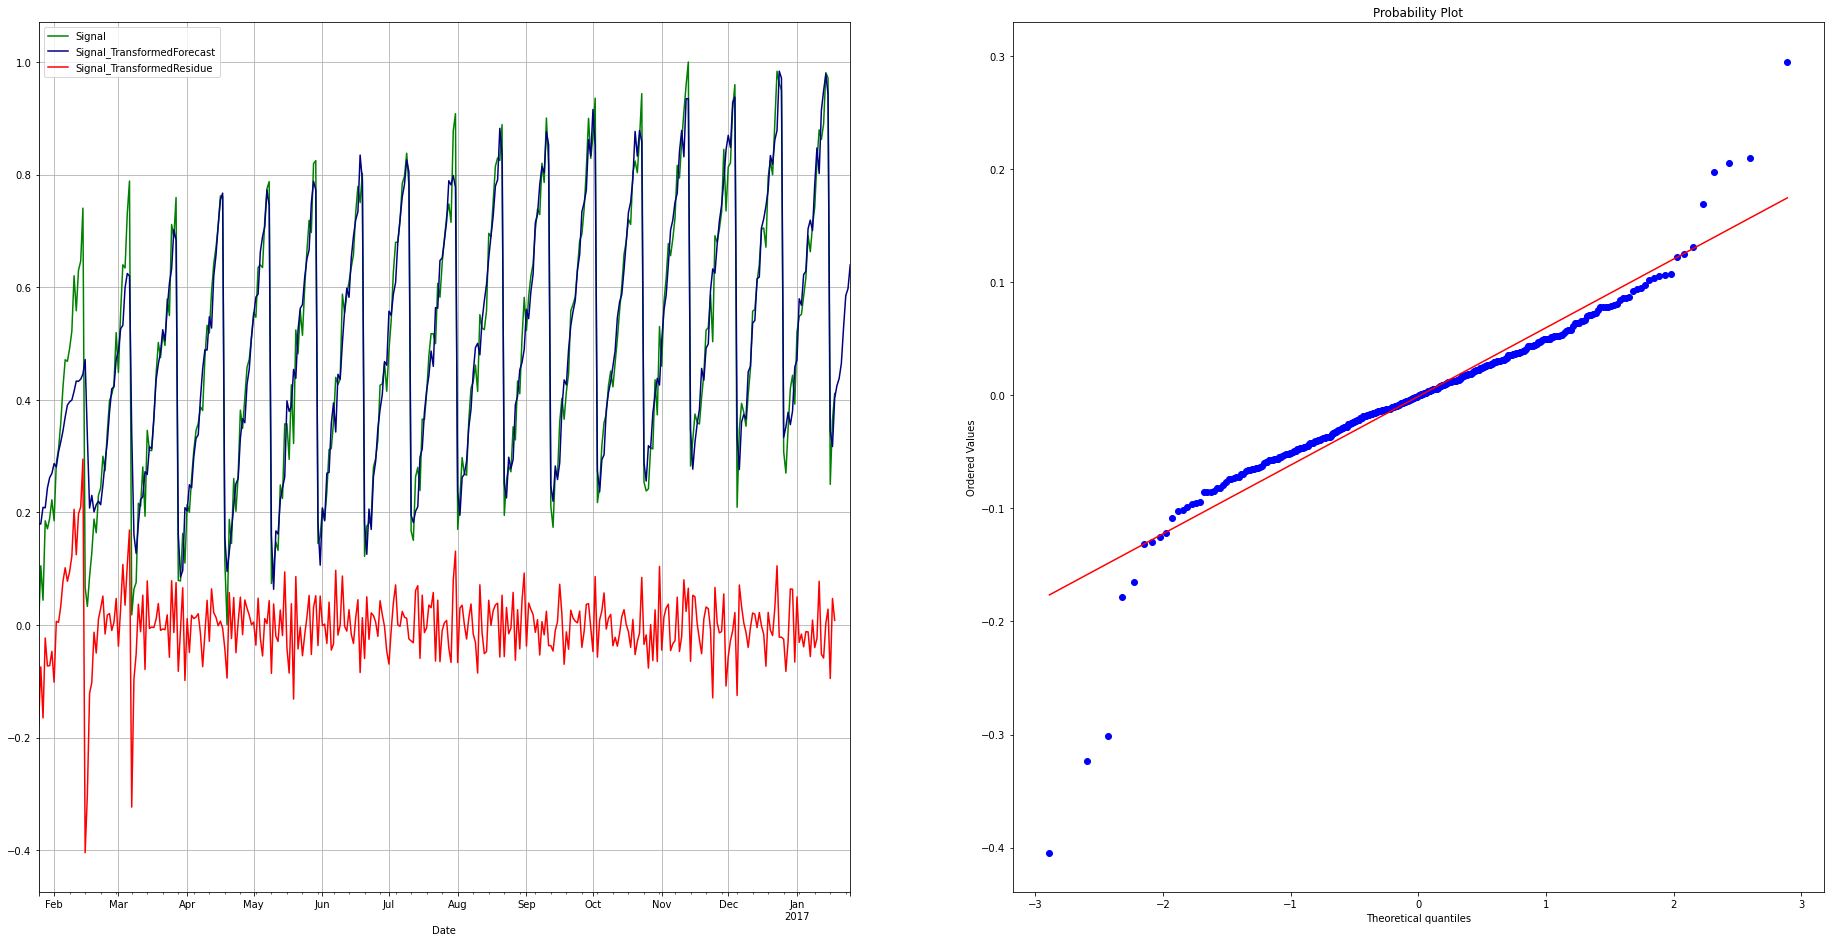

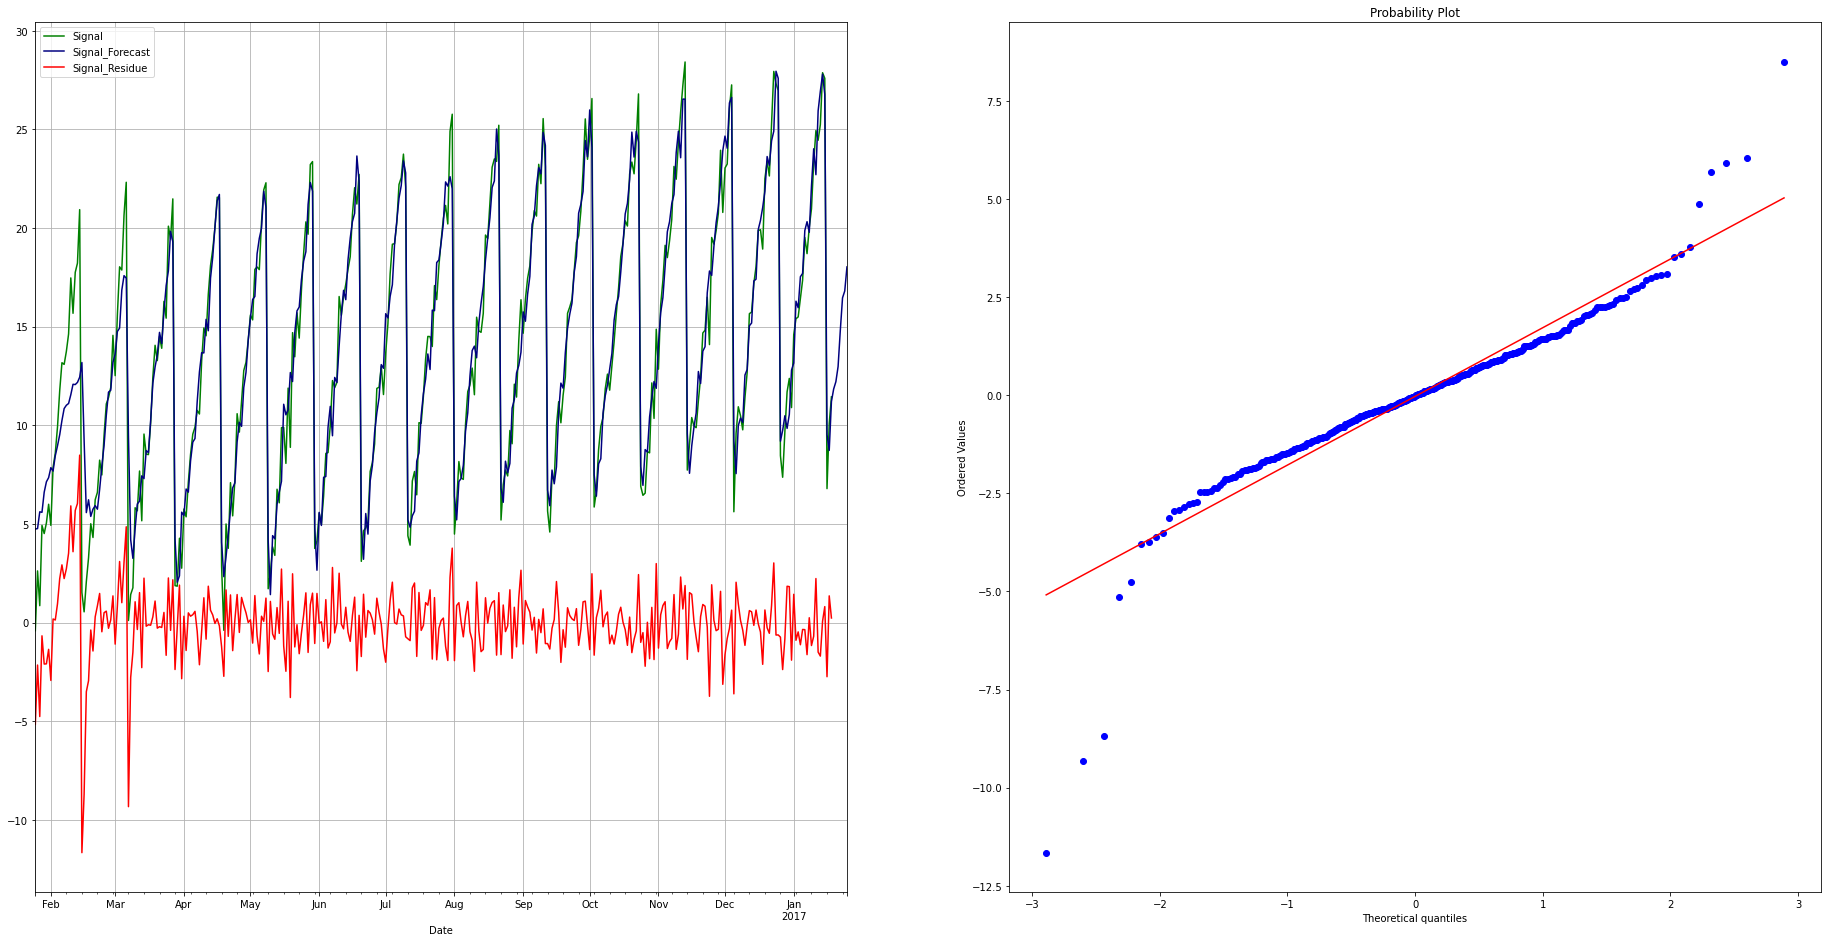

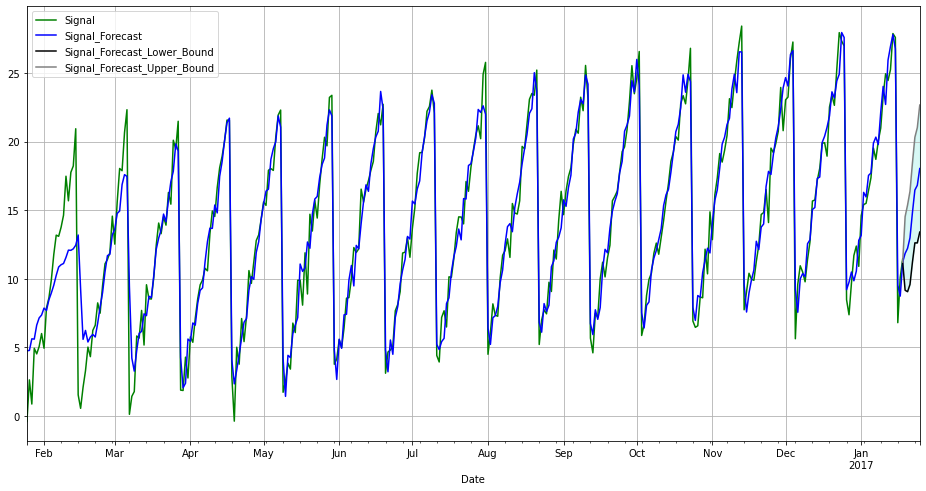

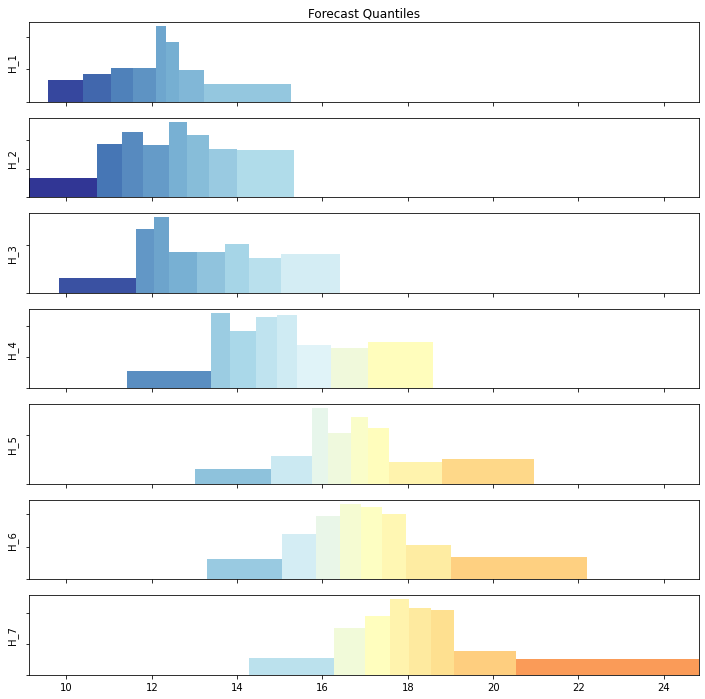

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Signal'], 'Horizon': 7}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.154, ('FORECASTING', {'Signals': ['Signal'], 'Horizon': 7}))


Index(['Date', 'Signal', 'row_number', 'Date_Normalized', '_Signal',
       '_Signal_LinearTrend', '_Signal_LinearTrend_residue',
       '_Signal_LinearTrend_residue_zeroCycle[0.0]',
       '_Signal_LinearTrend_residue_zeroCycle[0.0]_residue',
       '_Signal_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64)',
       '_Signal_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64)_residue',
       '_Signal_Trend', '_Signal_Trend_residue', '_Signal_Cycle',
       '_Signal_Cycle_residue', '_Signal_AR', '_Signal_AR_residue',
       '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound',
       'Signal_Forecast_Quantile_2', 'Signal_Forecast_Quantile_14',
       'Signal_Forecast_Quantile_26', 'Signal_Forecast_Quantile_38',
       'Signal_Forecast_Quantile_50', 'Signal_Forecast_Quantile_62',
       'Signal_Forecast_Quantile_74', 'Signal_Forecast_Quantile_86',
       'Signal_Forecas

In [8]:
import pickle

In [9]:
lEngine_str = pickle.dumps(lEngine)

In [10]:
lEngine_reloaded = pickle.loads(lEngine_str)

In [11]:
df_forecast_aftrer_reload = lEngine_reloaded.forecast(iInputDS = df_train, iHorizon = 7)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Signal'], 'Horizon': 7}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.164, ('FORECASTING', {'Signals': ['Signal'], 'Horizon': 7}))


In [12]:
df_forecast_aftrer_reload

,Date,Signal,row_number,Date_Normalized,_Signal,_Signal_LinearTrend,_Signal_LinearTrend_residue,_Signal_LinearTrend_residue_zeroCycle[0.0],_Signal_LinearTrend_residue_zeroCycle[0.0]_residue,_Signal_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64),...,Signal_Forecast_Upper_Bound,Signal_Forecast_Quantile_2,Signal_Forecast_Quantile_14,Signal_Forecast_Quantile_26,Signal_Forecast_Quantile_38,Signal_Forecast_Quantile_50,Signal_Forecast_Quantile_62,Signal_Forecast_Quantile_74,Signal_Forecast_Quantile_86,Signal_Forecast_Quantile_98
0,2016-01-25,-0.404905,0,0.000000,0.000000,0.337402,-0.337402,0.0,-0.337402,-0.158713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-26,2.624968,1,0.003559,0.105120,0.338287,-0.233167,0.0,-0.233167,-0.158713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-27,0.862909,2,0.007117,0.043986,0.339172,-0.295186,0.0,-0.295186,-0.130196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-28,4.929958,3,0.010676,0.185090,0.340057,-0.154967,0.0,-0.154967,-0.131885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-29,4.518222,4,0.014235,0.170805,0.340942,-0.170137,0.0,-0.170137,-0.097436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2017-01-21,NaN,362,1.288256,NaN,0.657822,NaN,0.0,NaN,-0.193409,...,16.376949,9.817961,11.639614,12.056251,12.409863,13.068702,13.721133,14.273108,15.032547,16.404023
363,2017-01-22,NaN,363,1.291815,NaN,0.658708,NaN,0.0,NaN,-0.130512,...,18.434724,11.416795,13.380133,13.840557,14.443070,14.929635,15.404796,16.208027,17.077938,18.589341
364,2017-01-23,NaN,364,1.295374,NaN,0.659593,NaN,0.0,NaN,-0.074337,...,20.313395,13.001093,14.787032,15.763086,16.124907,16.667401,17.075483,17.563174,18.793324,20.967187
365,2017-01-24,NaN,365,1.298932,NaN,0.660478,NaN,0.0,NaN,-0.063173,...,21.013034,13.293784,15.045515,15.849499,16.421370,16.899964,17.398489,17.949373,19.006823,22.202690


INFO:pyaf.timing:('OPERATION_START', ('PLOTTING', {'Signals': ['Signal']}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 1.535, ('PLOTTING', {'Signals': ['Signal']}))


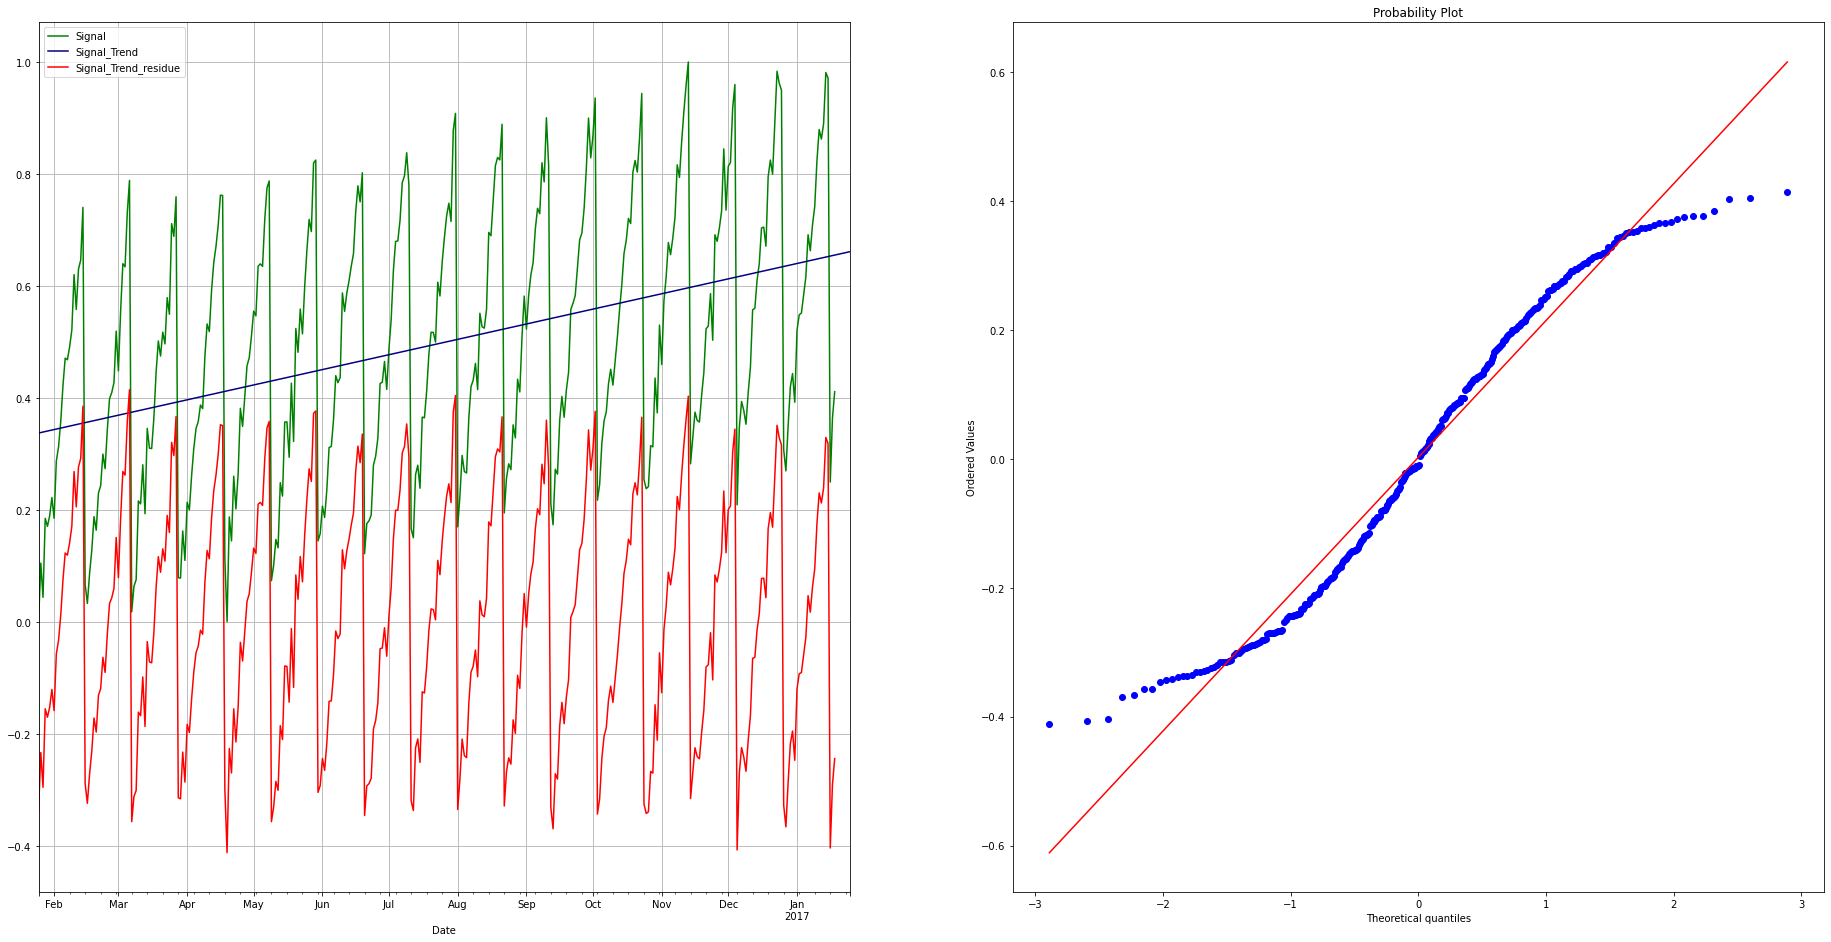

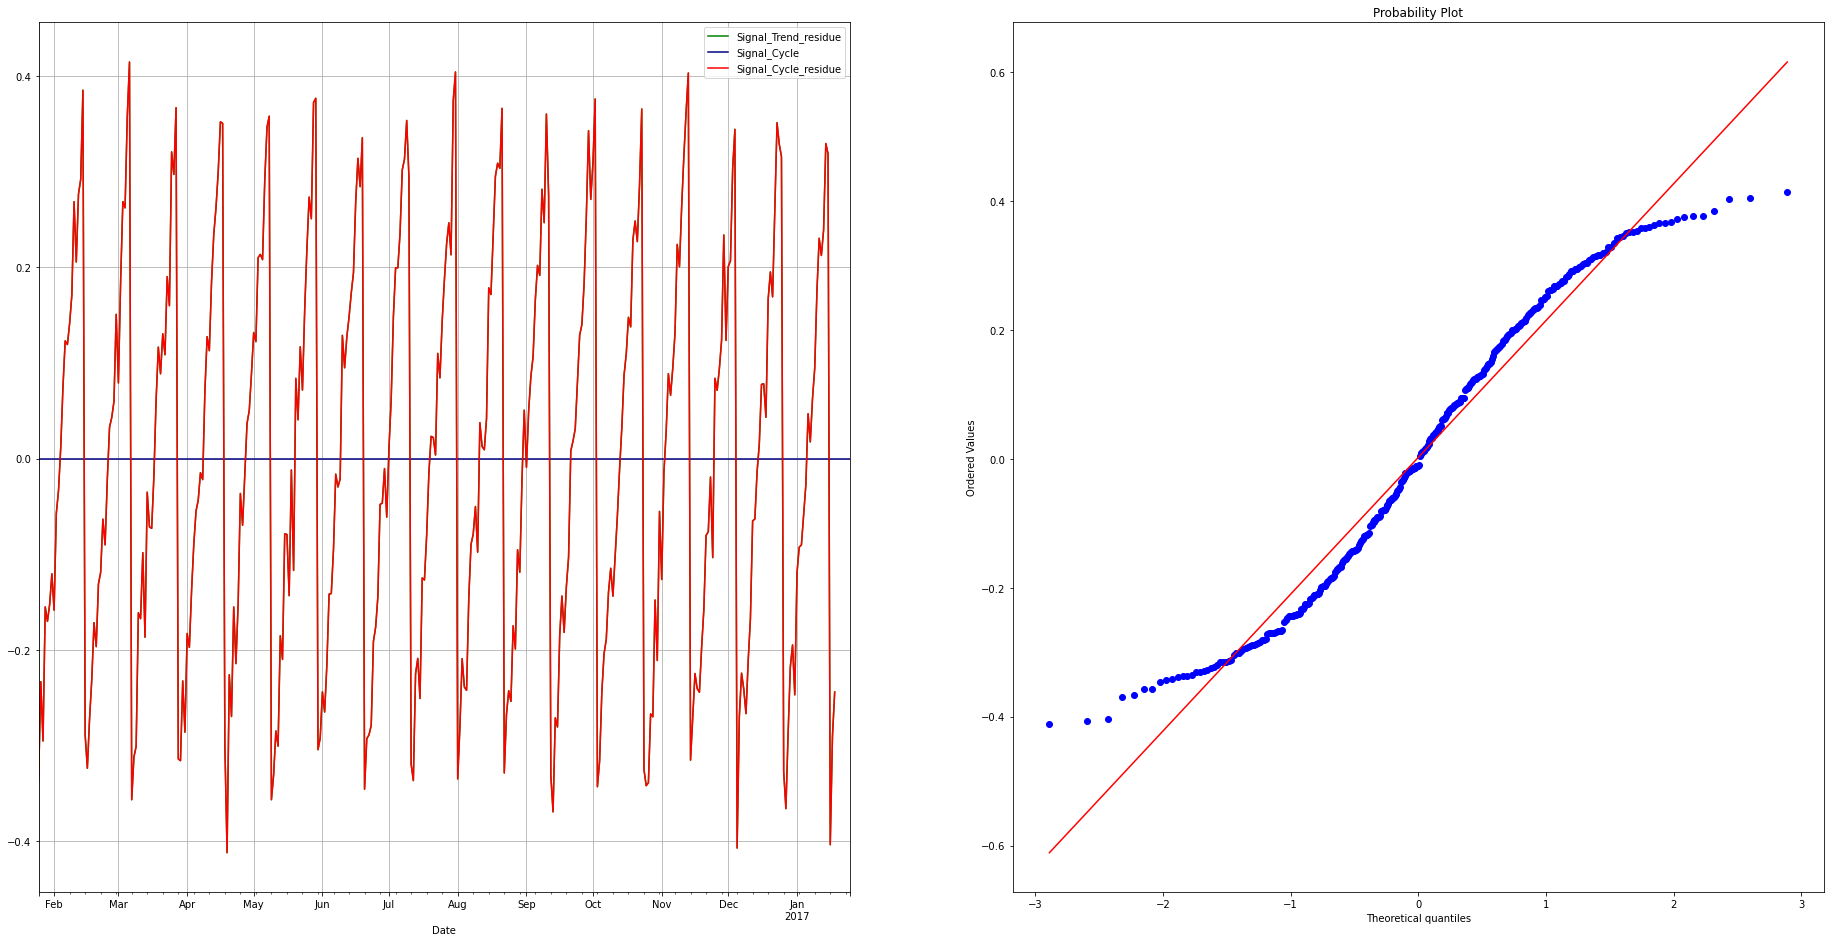

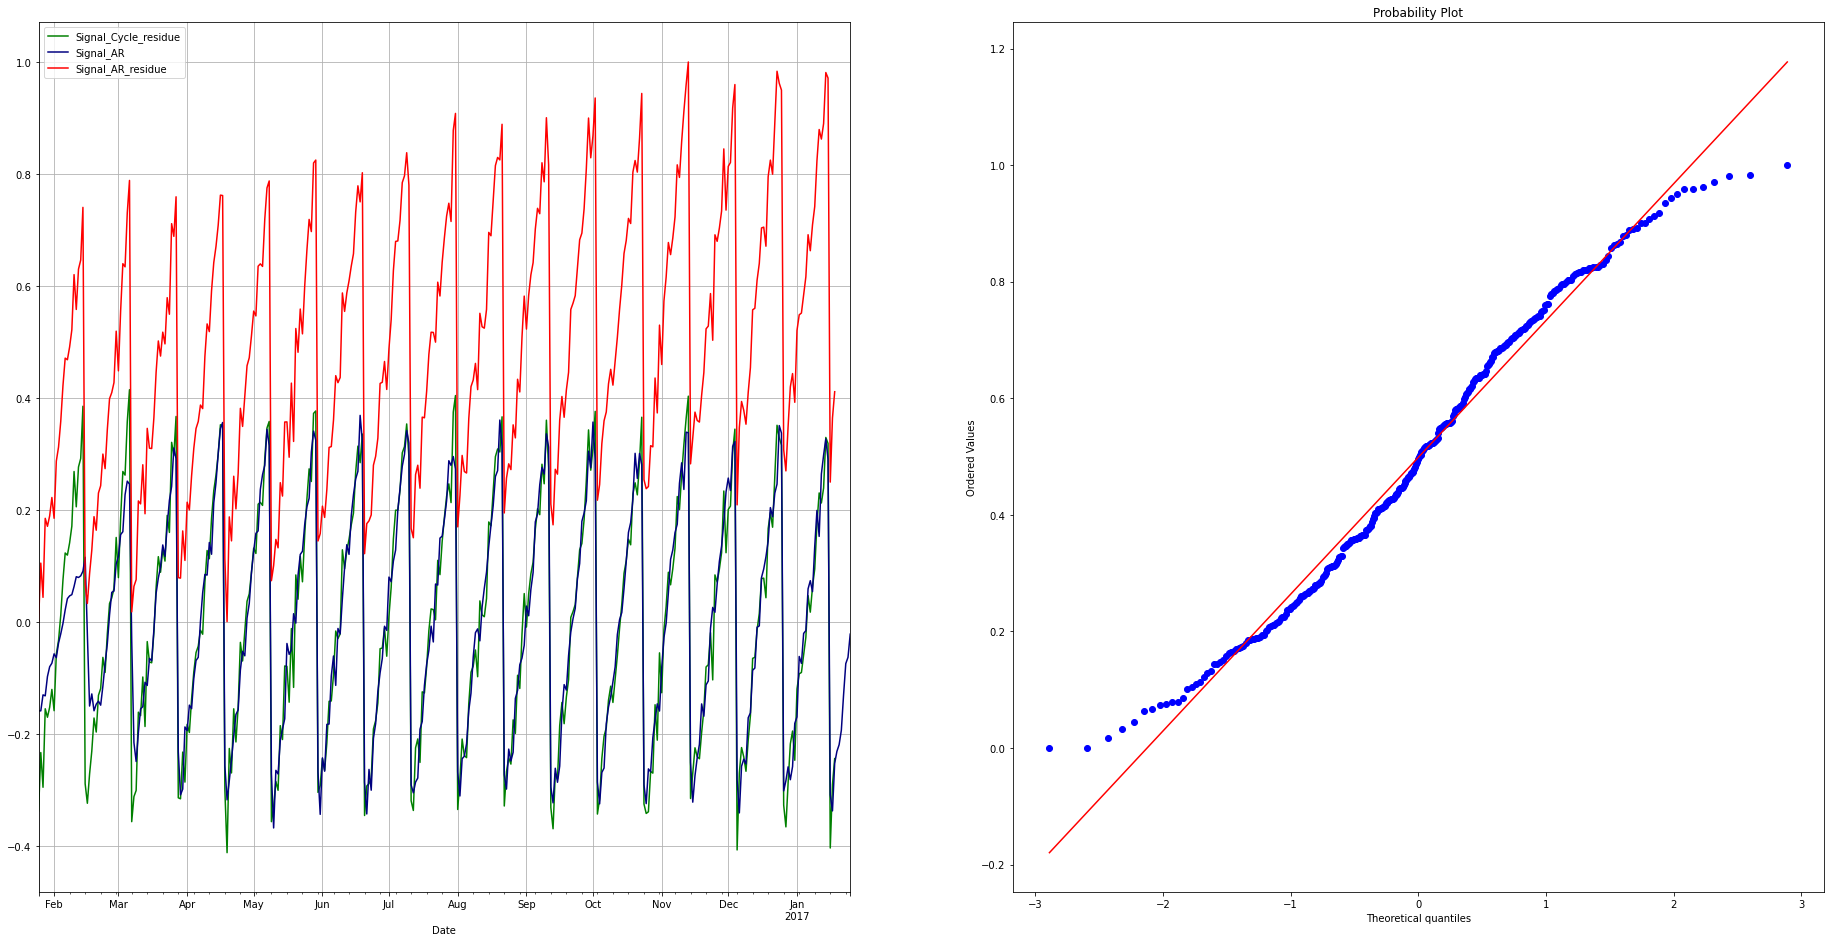

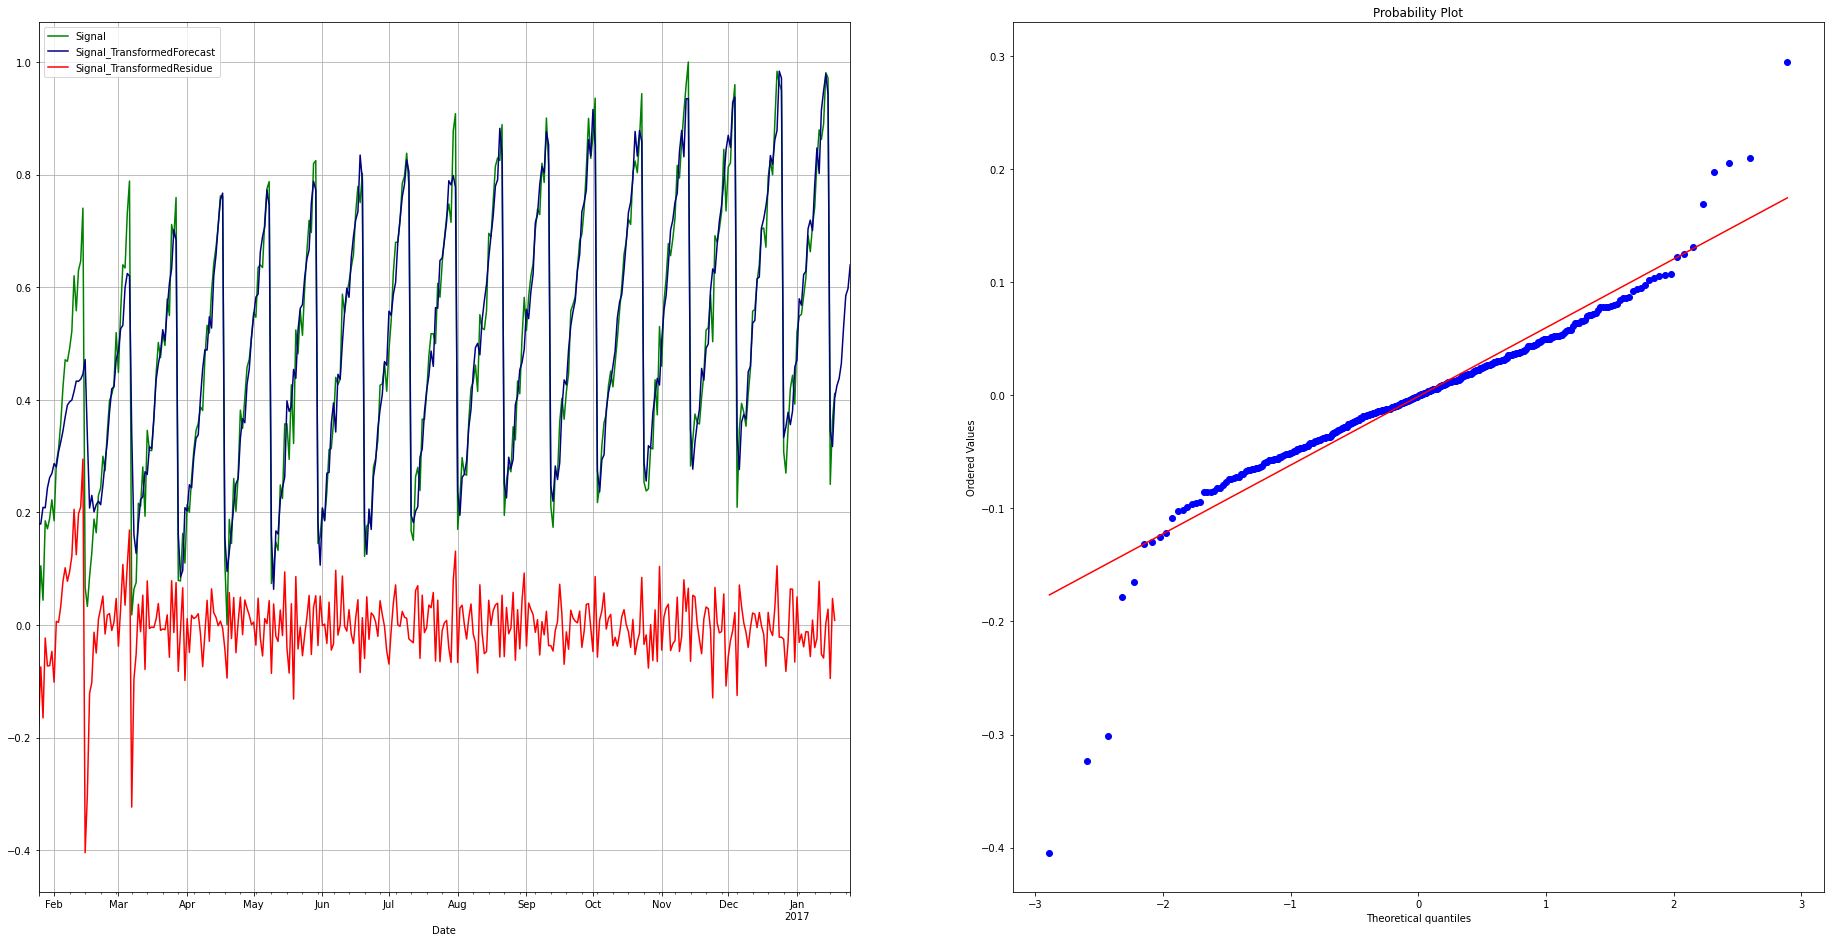

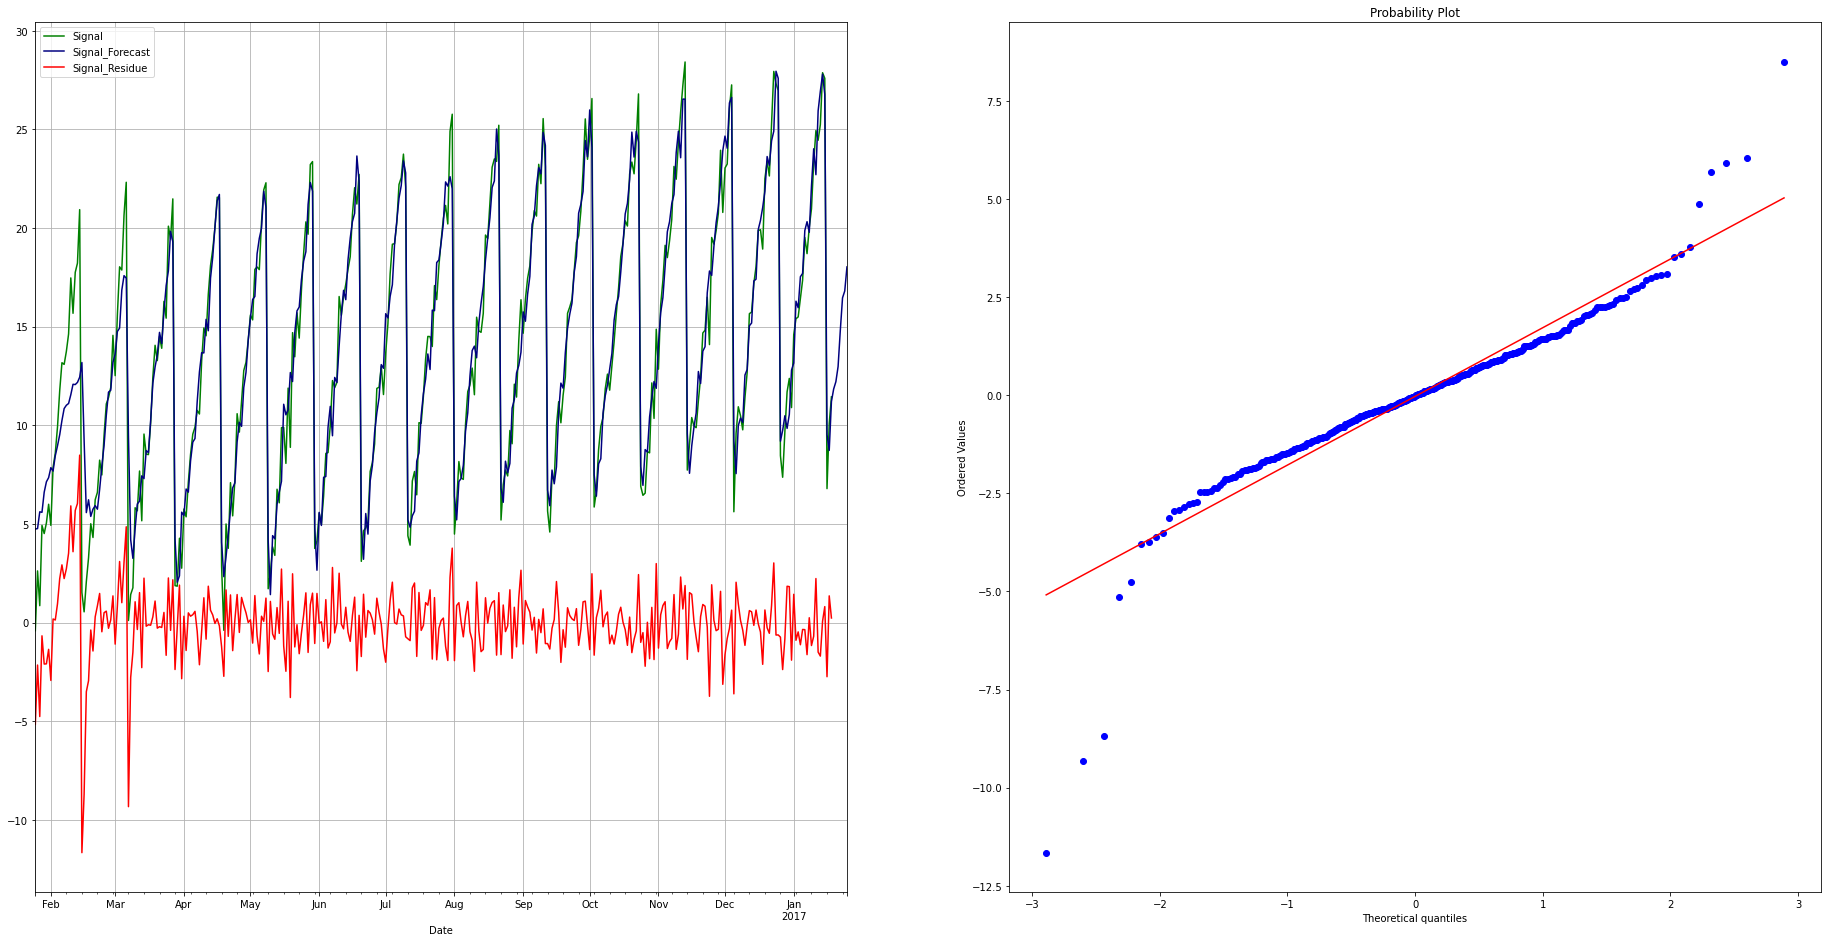

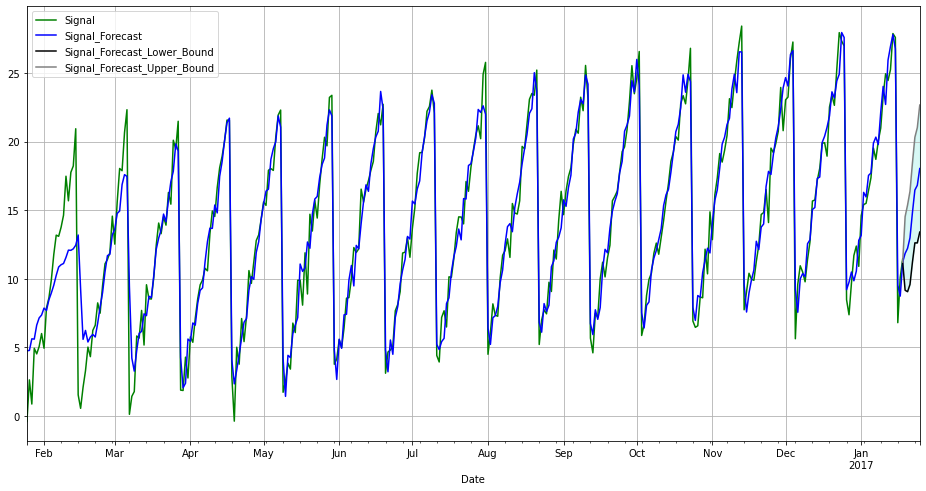

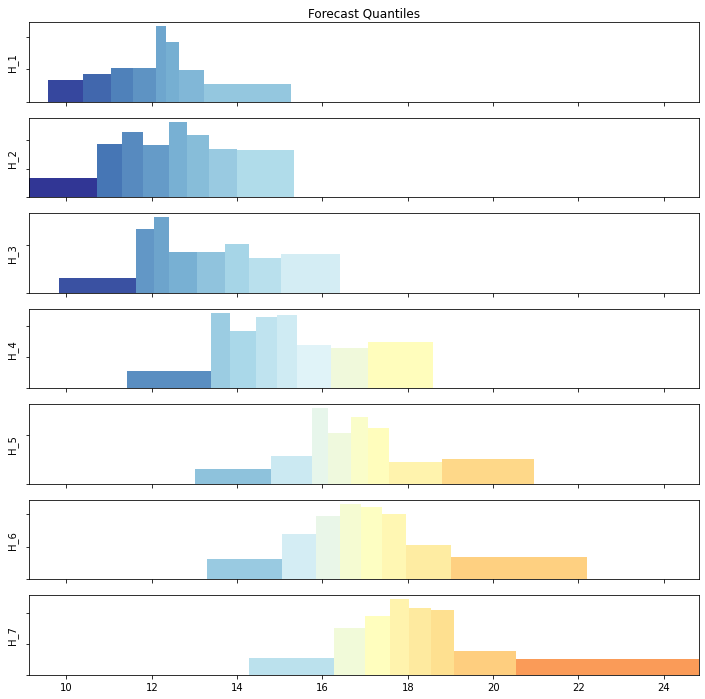

In [13]:
lEngine_reloaded.standardPlots()

In [14]:
df_forecast.describe()

,Signal,row_number,Date_Normalized,_Signal,_Signal_LinearTrend,_Signal_LinearTrend_residue,_Signal_LinearTrend_residue_zeroCycle[0.0],_Signal_LinearTrend_residue_zeroCycle[0.0]_residue,_Signal_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64),_Signal_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64)_residue,...,Signal_Forecast_Upper_Bound,Signal_Forecast_Quantile_2,Signal_Forecast_Quantile_14,Signal_Forecast_Quantile_26,Signal_Forecast_Quantile_38,Signal_Forecast_Quantile_50,Signal_Forecast_Quantile_62,Signal_Forecast_Quantile_74,Signal_Forecast_Quantile_86,Signal_Forecast_Quantile_98
count,360.000000,367.000000,367.000000,360.000000,367.000000,360.000000,367.0,360.000000,367.000000,360.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,13.968554,183.000000,0.651246,0.498680,0.499382,0.002395,0.0,0.002395,0.000798,0.498680,...,18.385631,11.498513,13.175609,13.836914,14.335795,14.872211,15.330152,15.863818,16.809018,19.080698
std,6.781300,106.088014,0.377537,0.235274,0.093903,0.214621,0.0,0.214621,0.198152,0.235274,...,3.079960,2.058230,2.303299,2.420605,2.446601,2.394193,2.432993,2.483489,2.793623,3.704354
min,-0.404905,0.000000,0.000000,0.000000,0.337402,-0.411947,0.0,-0.411947,-0.367807,0.000000,...,14.528441,9.124652,10.386803,11.035759,11.569041,12.101172,12.341375,12.643710,13.219053,15.256305
25%,8.593333,91.500000,0.325623,0.312189,0.418392,-0.183346,0.0,-0.183346,-0.160415,0.312189,...,15.873698,9.688845,11.181924,11.684569,12.104118,12.734973,13.270641,13.801935,14.509390,15.865908
50%,13.952480,183.000000,0.651246,0.498122,0.499382,-0.009710,0.0,-0.009710,-0.011478,0.498122,...,18.434724,11.416795,13.380133,13.840557,14.443070,14.929635,15.404796,16.208027,17.077938,18.589341
75%,19.485450,274.500000,0.976868,0.690086,0.580373,0.185133,0.0,0.185133,0.161884,0.690086,...,20.663215,13.147439,14.916274,15.806292,16.273138,16.783683,17.236986,17.756274,18.900073,21.584939
max,28.418115,366.000000,1.302491,1.000000,0.661363,0.414783,0.0,0.414783,0.368934,1.000000,...,22.662423,14.275578,16.265933,17.000357,17.583941,18.037362,18.549640,19.078574,20.547205,24.817548


In [15]:
df_forecast_aftrer_reload.describe()

,Signal,row_number,Date_Normalized,_Signal,_Signal_LinearTrend,_Signal_LinearTrend_residue,_Signal_LinearTrend_residue_zeroCycle[0.0],_Signal_LinearTrend_residue_zeroCycle[0.0]_residue,_Signal_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64),_Signal_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64)_residue,...,Signal_Forecast_Upper_Bound,Signal_Forecast_Quantile_2,Signal_Forecast_Quantile_14,Signal_Forecast_Quantile_26,Signal_Forecast_Quantile_38,Signal_Forecast_Quantile_50,Signal_Forecast_Quantile_62,Signal_Forecast_Quantile_74,Signal_Forecast_Quantile_86,Signal_Forecast_Quantile_98
count,360.000000,367.000000,367.000000,360.000000,367.000000,360.000000,367.0,360.000000,367.000000,360.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,13.968554,183.000000,0.651246,0.498680,0.499382,0.002395,0.0,0.002395,0.000798,0.498680,...,18.385631,11.498513,13.175609,13.836914,14.335795,14.872211,15.330152,15.863818,16.809018,19.080698
std,6.781300,106.088014,0.377537,0.235274,0.093903,0.214621,0.0,0.214621,0.198152,0.235274,...,3.079960,2.058230,2.303299,2.420605,2.446601,2.394193,2.432993,2.483489,2.793623,3.704354
min,-0.404905,0.000000,0.000000,0.000000,0.337402,-0.411947,0.0,-0.411947,-0.367807,0.000000,...,14.528441,9.124652,10.386803,11.035759,11.569041,12.101172,12.341375,12.643710,13.219053,15.256305
25%,8.593333,91.500000,0.325623,0.312189,0.418392,-0.183346,0.0,-0.183346,-0.160415,0.312189,...,15.873698,9.688845,11.181924,11.684569,12.104118,12.734973,13.270641,13.801935,14.509390,15.865908
50%,13.952480,183.000000,0.651246,0.498122,0.499382,-0.009710,0.0,-0.009710,-0.011478,0.498122,...,18.434724,11.416795,13.380133,13.840557,14.443070,14.929635,15.404796,16.208027,17.077938,18.589341
75%,19.485450,274.500000,0.976868,0.690086,0.580373,0.185133,0.0,0.185133,0.161884,0.690086,...,20.663215,13.147439,14.916274,15.806292,16.273138,16.783683,17.236986,17.756274,18.900073,21.584939
max,28.418115,366.000000,1.302491,1.000000,0.661363,0.414783,0.0,0.414783,0.368934,1.000000,...,22.662423,14.275578,16.265933,17.000357,17.583941,18.037362,18.549640,19.078574,20.547205,24.817548
